# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

# Import Data from CSV to Pandas

In [2]:
df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# Take a look at the df
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null object
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
# We can see above the 'Date' is an object not a datetime, convert below
df['Date'] = pd.to_datetime(df['Date'], yearfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null datetime64[ns]
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
dfmax = df.pivot_table(index='Date', columns='Element', aggfunc='max')
dfmax.drop('ID', 1, inplace=True)
dfmax.columns = dfmax.columns.droplevel()
dfmax.drop('TMIN', 1, inplace=True)
dfmax.head()

Element,TMAX
Date,
2005-01-01,156
2005-01-02,139
2005-01-03,133
2005-01-04,39
2005-01-05,33


In [5]:
dfmin = df.pivot_table(index='Date', columns='Element', aggfunc='min')
dfmin.drop('ID', 1, inplace=True)
dfmin.columns = dfmin.columns.droplevel()
dfmin.drop('TMAX', 1, inplace=True)
dfmin.head()

Element,TMIN
Date,
2005-01-01,-56
2005-01-02,-56
2005-01-03,0
2005-01-04,-39
2005-01-05,-94


In [6]:
# 2015 Record Data
df3 = pd.concat([dfmax, dfmin], axis=1)
df2015 = df3[3652:]
df2015['TMAX'] = df2015['TMAX']/10
df2015['TMIN'] = df2015['TMIN']/10
df2015['TMAX15'] = df2015['TMAX']
df2015['TMIN15'] = df2015['TMIN']
df2015.drop('TMAX', 1, inplace=True)
df2015.drop('TMIN', 1, inplace=True)
df2015 = df2015.reset_index()
df2015.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Element,Date,TMAX15,TMIN15
0,2015-01-01,1.1,-13.3
1,2015-01-02,3.9,-12.2
2,2015-01-03,3.9,-6.7
3,2015-01-04,4.4,-8.8
4,2015-01-05,2.8,-15.5


In [7]:
import datetime
dfhist = df3[:-365]
dfhist = dfhist.reset_index()
dfhist['Date'] = dfhist['Date'].apply(lambda x: x.strftime('%m-%d-00'))
dfhist['Date'] = pd.to_datetime(dfhist['Date'])
# Max
dfhistmax = dfhist.drop('TMIN', 1)
dfhistmax = dfhistmax.pivot_table(values='TMAX', index=['Date'], aggfunc='max')
dfhistmax = dfhistmax.to_frame()
# Min
dfhistmin = dfhist.drop('TMAX', 1)
dfhistmin = dfhistmin.pivot_table(values='TMIN', index=['Date'], aggfunc='min')
dfhistmin = dfhistmin.to_frame()
print(dfhistmin.head())
print(dfhistmax.head())

            TMIN
Date            
2000-01-01  -160
2000-01-02  -267
2000-01-03  -267
2000-01-04  -261
2000-01-05  -150
            TMAX
Date            
2000-01-01   156
2000-01-02   139
2000-01-03   133
2000-01-04   106
2000-01-05   128


In [8]:
dfhistc = pd.concat([dfhistmax, dfhistmin], axis=1)
dfhistc = dfhistc.reset_index()
dfhistc['Date'] = dfhistc['Date'].apply(lambda x: x.strftime('%m-%d'))
dfhistc.set_index('Date', inplace=True)
dfhistc.drop(dfhistc.index[59], inplace=True)
dfhistc = dfhistc.reset_index()
dfhistc['TMAX'] = dfhistc['TMAX']/10
dfhistc['TMIN'] = dfhistc['TMIN']/10
dfhistc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
Date    365 non-null object
TMAX    365 non-null float64
TMIN    365 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.6+ KB


In [9]:
# Merge historical and 2015 dfs
dfhistc = pd.concat([dfhistc, df2015], axis=1)
#dfhistc['2015Max'] = "NaN"
dfhistc['2015Max'] = np.where((dfhistc['TMAX15'] > dfhistc['TMAX']), dfhistc['TMAX15'], np.nan)
dfhistc['2015Min'] = np.where((dfhistc['TMIN15'] < dfhistc['TMIN']), dfhistc['TMIN15'], np.nan)
dfhistc.head()

,Date,TMAX,TMIN,Date,TMAX15,TMIN15,2015Max,2015Min
0,01-01,15.6,-16.0,2015-01-01,1.1,-13.3,NaN,NaN
1,01-02,13.9,-26.7,2015-01-02,3.9,-12.2,NaN,NaN
2,01-03,13.3,-26.7,2015-01-03,3.9,-6.7,NaN,NaN
3,01-04,10.6,-26.1,2015-01-04,4.4,-8.8,NaN,NaN
4,01-05,12.8,-15.0,2015-01-05,2.8,-15.5,NaN,-15.5


<IPython.core.display.Javascript object>


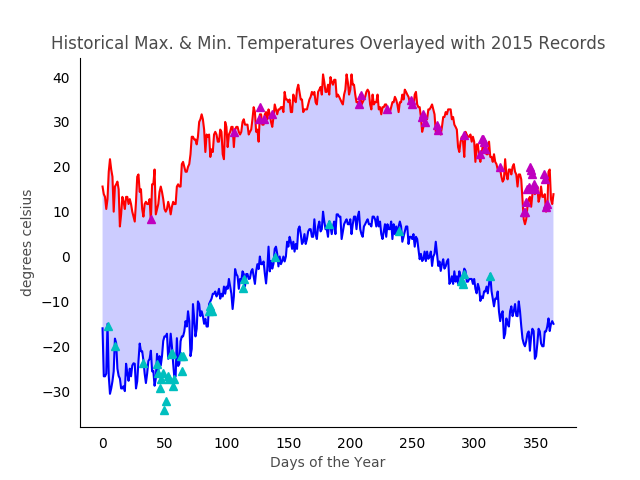

In [10]:
%matplotlib notebook
plt.figure()
# plot the linear data and the exponential data
plt.plot(dfhistc['TMAX'], '-r', dfhistc['TMIN'], '-b')
# Fill
plt.gca().fill_between(range(len(dfhistc)), 
                       dfhistc['TMAX'], dfhistc['TMIN'], 
                       facecolor='blue', 
                       alpha=0.20)
# plot points where 2015 broke records
plt.plot(dfhistc['2015Max'], 'm^', dfhistc['2015Min'], 'c^', ms=6.0)

# Beautify & Lables
ax = plt.gca()
ax.set_xlabel('Days of the Year', alpha=0.7)
ax.set_ylabel('degrees celsius', alpha=0.7)
ax.set_title('Historical Max. & Min. Temperatures Overlayed with 2015 Records', alpha=0.7)
# Remove ticks 
plt.tick_params(top='off', bottom='off', left='off', right='off')
# remove the frame of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
